In [2]:
import pandas as pd
import numpy as np

# 1. 读取原始数据
input_path = r"D:\项目\肺癌预测系统后端\data\raw\Lung Cancer Dataset.csv"
df = pd.read_csv(input_path)

np.random.seed(42)

# 2. 构造 UI 所需特征
ui_df = pd.DataFrame()

# 年龄
ui_df["年龄"] = df["AGE"]

# 吸烟年限（按年龄和是否吸烟估算）
ui_df["吸烟年限"] = (
    df["AGE"]
    * df["SMOKING"]
    * np.random.uniform(0.3, 0.7, size=len(df))
).round().astype(int)

# 日吸烟量（支）
ui_df["日吸烟量"] = np.where(
    df["SMOKING"] == 1,
    np.random.randint(5, 21, size=len(df)),
    0
)

# 家族病史
ui_df["家族病史"] = df["FAMILY_HISTORY"]

# 空气污染指数 AQI
ui_df["空气污染指数"] = np.where(
    df["EXPOSURE_TO_POLLUTION"] == 1,
    np.random.randint(80, 151, size=len(df)),
    np.random.randint(10, 51, size=len(df))
)

# 慢性肺病
ui_df["慢性肺病"] = df["LONG_TERM_ILLNESS"]

# 癌症发病率（作为先验风险特征）
ui_df["癌症发病率"] = np.random.uniform(0.03, 0.08, size=len(df)).round(3)

# 是否患病（标签）
ui_df["是否患病"] = df["PULMONARY_DISEASE"].map({"YES": 1, "NO": 0})

# 3. 保存新 CSV
output_path = r"D:\项目\肺癌预测系统后端\data\processed\lung_ui_dataset.csv"
ui_df.to_csv(output_path, index=False, encoding="utf-8-sig")

print("✅ 转换完成，已生成：", output_path)
print(ui_df.head())

✅ 转换完成，已生成： D:\项目\肺癌预测系统后端\data\processed\lung_ui_dataset.csv
   年龄  吸烟年限  日吸烟量  家族病史  空气污染指数  慢性肺病  癌症发病率  是否患病
0  68    31     7     0     131     0  0.035     0
1  81    55    12     0      83     1  0.072     1
2  58    34    11     0      12     0  0.050     0
3  44    24    20     0     148     0  0.043     1
4  72    26    20     0     112     1  0.059     1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 中文显示（Windows）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据路径
data_path = r"D:\项目\肺癌预测系统后端\data\processed\lung_ui_dataset.csv"

df = pd.read_csv(data_path)
df.head()


,年龄,吸烟年限,日吸烟量,家族病史,空气污染指数,慢性肺病,癌症发病率,是否患病
0,68,31,7,0,131,0,0.035,0
1,81,55,12,0,83,1,0.072,1
2,58,34,11,0,12,0,0.050,0
3,44,24,20,0,148,0,0.043,1
4,72,26,20,0,112,1,0.059,1


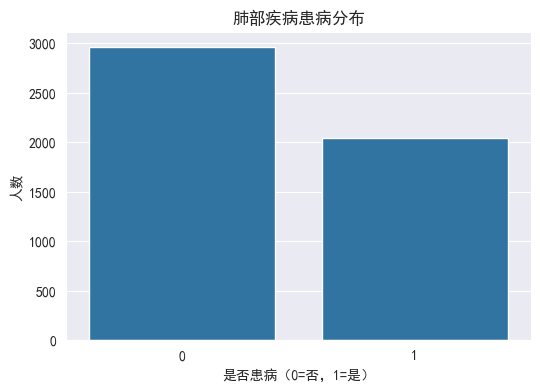

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x="是否患病", data=df)
plt.title("肺部疾病患病分布")
plt.xlabel("是否患病（0=否，1=是）")
plt.ylabel("人数")
plt.show()


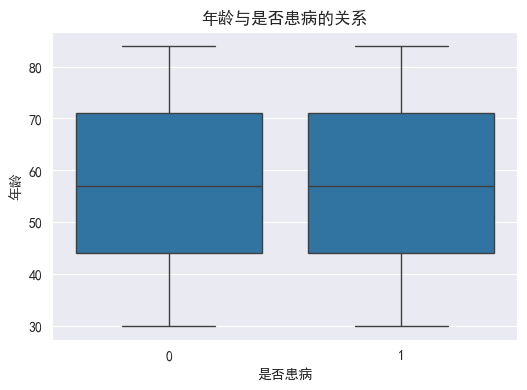

In [5]:
plt.figure(figsize=(6,4))
sns.boxplot(x="是否患病", y="年龄", data=df)
plt.title("年龄与是否患病的关系")
plt.show()


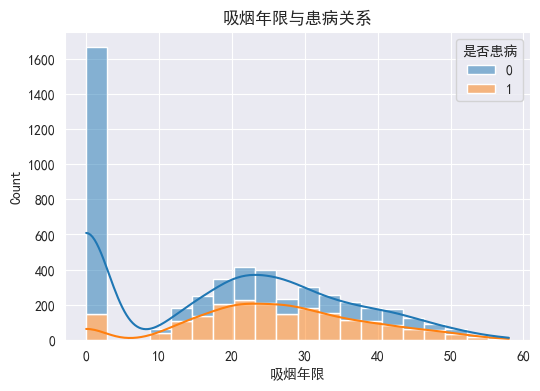

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(
    data=df,
    x="吸烟年限",
    hue="是否患病",
    bins=20,
    kde=True,
    multiple="stack"
)
plt.title("吸烟年限与患病关系")
plt.show()


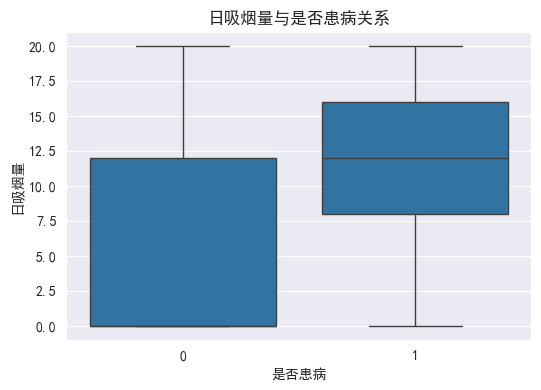

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(x="是否患病", y="日吸烟量", data=df)
plt.title("日吸烟量与是否患病关系")
plt.show()


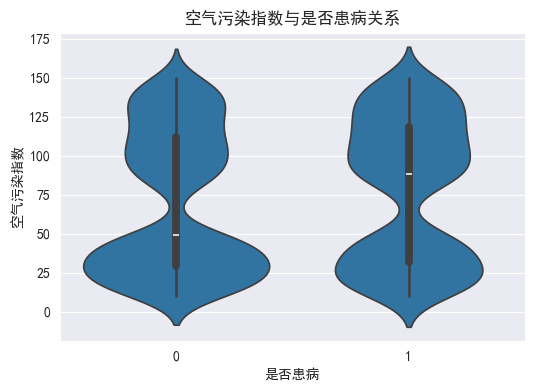

In [8]:
plt.figure(figsize=(6,4))
sns.violinplot(x="是否患病", y="空气污染指数", data=df)
plt.title("空气污染指数与是否患病关系")
plt.show()


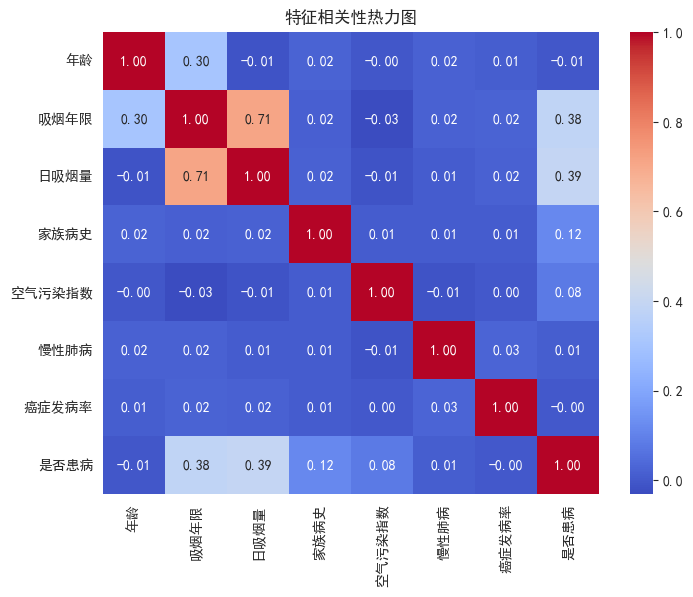

In [9]:
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("特征相关性热力图")
plt.show()


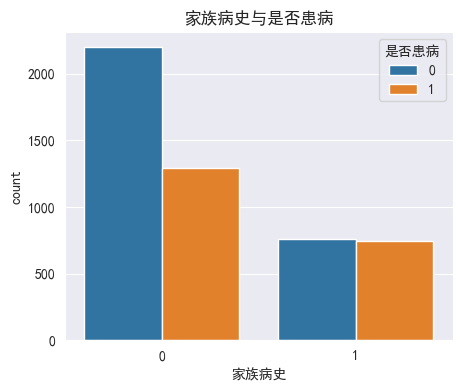

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x="家族病史", hue="是否患病", data=df)
plt.title("家族病史与是否患病")
plt.show()
